<a href="https://colab.research.google.com/github/GeisilaCosta/challengeTelecom2/blob/main/telecom2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import requests


In [17]:
# Carregar os dados
import pandas as pd
df = pd.read_csv('/content/sample_data/dados_tratados (1).csv')

# Verificar se há valores ausentes
print(df.isnull().sum())

# Verificar os tipos de dados
print(df.dtypes)

# Verificar valores únicos de algumas colunas categóricas
print(df['Churn'].unique())
print(df['InternetService'].unique())

customerID              0
Churn                   0
gender                  0
Idoso                   0
Partner                 0
Dependents              0
MesesComoCliente        0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
TipoContrato            0
PaperlessBilling        0
MetodoPagamento         0
GastoMensal             0
GastoTotal              0
GastoDiario             0
Churn_bin               0
Partner_bin             0
Dependents_bin          0
PhoneService_bin        0
MultipleLines_bin       0
OnlineSecurity_bin      0
OnlineBackup_bin        0
DeviceProtection_bin    0
TechSupport_bin         0
StreamingTV_bin         0
StreamingMovies_bin     0
PaperlessBilling_bin    0
QtdServicos             0
dtype: int64
customerID               object
Churn                    object
gender       

In [18]:
# Ver quais colunas existem no DataFrame
print(df.columns)


Index(['customerID', 'Churn', 'gender', 'Idoso', 'Partner', 'Dependents',
       'MesesComoCliente', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'TipoContrato', 'PaperlessBilling',
       'MetodoPagamento', 'GastoMensal', 'GastoTotal', 'GastoDiario',
       'Churn_bin', 'Partner_bin', 'Dependents_bin', 'PhoneService_bin',
       'MultipleLines_bin', 'OnlineSecurity_bin', 'OnlineBackup_bin',
       'DeviceProtection_bin', 'TechSupport_bin', 'StreamingTV_bin',
       'StreamingMovies_bin', 'PaperlessBilling_bin', 'QtdServicos'],
      dtype='object')


In [19]:
colunas_para_remover = [
    'customerID', 'Churn',
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling',
    'GastoTotal', 'GastoDiario'
]

df = df.drop(columns=colunas_para_remover)

print(df.columns)


Index(['gender', 'Idoso', 'MesesComoCliente', 'InternetService',
       'TipoContrato', 'MetodoPagamento', 'GastoMensal', 'Churn_bin',
       'Partner_bin', 'Dependents_bin', 'PhoneService_bin',
       'MultipleLines_bin', 'OnlineSecurity_bin', 'OnlineBackup_bin',
       'DeviceProtection_bin', 'TechSupport_bin', 'StreamingTV_bin',
       'StreamingMovies_bin', 'PaperlessBilling_bin', 'QtdServicos'],
      dtype='object')


In [20]:
# Aplicar One-Hot Encoding nas colunas categóricas
colunas_categoricas = ['gender', 'InternetService', 'TipoContrato', 'MetodoPagamento']

df = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

# Verificar como ficou o DataFrame
print(df.head())
print(df.columns)


   Idoso  MesesComoCliente  GastoMensal  Churn_bin  Partner_bin  \
0      0                 9         65.6          0            1   
1      0                 9         59.9          0            0   
2      0                 4         73.9          1            0   
3      1                13         98.0          1            1   
4      1                 3         83.9          1            1   

   Dependents_bin  PhoneService_bin  MultipleLines_bin  OnlineSecurity_bin  \
0               1                 1                  0                   0   
1               0                 1                  1                   0   
2               0                 1                  0                   0   
3               0                 1                  0                   0   
4               0                 1                  0                   0   

   OnlineBackup_bin  ...  PaperlessBilling_bin  QtdServicos  gender_Male  \
0                 1  ...                     1      

In [21]:
# Contar os valores de cada classe
contagem_churn = df['Churn_bin'].value_counts()

# Calcular proporções
proporcao_churn = df['Churn_bin'].value_counts(normalize=True)

# Exibir os resultados
print("Contagem de clientes por classe:")
print(contagem_churn)

print("\nProporção de clientes por classe:")
print(proporcao_churn)


Contagem de clientes por classe:
Churn_bin
0    5163
1    1869
Name: count, dtype: int64

Proporção de clientes por classe:
Churn_bin
0    0.734215
1    0.265785
Name: proportion, dtype: float64


In [22]:
pip install imbalanced-learn


In [23]:
from collections import Counter

# Verificar distribuição da variável target
print("Distribuição original:")
print(Counter(df['Churn_bin']))


Distribuição original:
Counter({0: 5163, 1: 1869})


In [24]:
# Separar variáveis independentes (X) e dependente (y)
X = df.drop('Churn_bin', axis=1)
y = df['Churn_bin']


In [25]:
from imblearn.over_sampling import SMOTE

# Instanciar o SMOTE
smote = SMOTE(random_state=42)

# Aplicar oversampling
X_res, y_res = smote.fit_resample(X, y)

# Verificar nova distribuição
print("Distribuição após SMOTE:")
print(Counter(y_res))


Distribuição após SMOTE:
Counter({0: 5163, 1: 5163})


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


In [27]:
from sklearn.preprocessing import StandardScaler

# Selecionar colunas numéricas contínuas
colunas_a_escalar = ['MesesComoCliente', 'GastoMensal', 'QtdServicos']

# Instanciar o scaler
scaler = StandardScaler()

# Aplicar padronização apenas nessas colunas
X_res[colunas_a_escalar] = scaler.fit_transform(X_res[colunas_a_escalar])


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Separar treino e teste (depois do SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# 2. Padronizar variáveis contínuas
colunas_continuas = ['MesesComoCliente', 'GastoMensal', 'QtdServicos']
scaler = StandardScaler()
X_train[colunas_continuas] = scaler.fit_transform(X_train[colunas_continuas])
X_test[colunas_continuas] = scaler.transform(X_test[colunas_continuas])

# 3. Treinar modelo
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)

# 4. Fazer previsões e avaliar
y_pred = modelo_log.predict(X_test)

print("📊 Regressão Logística:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


📊 Regressão Logística:
[[858 175]
 [186 847]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1033
           1       0.83      0.82      0.82      1033

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [29]:
from sklearn.tree import DecisionTreeClassifier

# Usando os mesmos dados já balanceados e divididos (X_train, X_test, y_train, y_test)

# 1. Treinar modelo de árvore
modelo_tree = DecisionTreeClassifier(random_state=42)
modelo_tree.fit(X_train, y_train)

# 2. Avaliar
y_pred_tree = modelo_tree.predict(X_test)

print("🌳 Decision Tree:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


🌳 Decision Tree:
[[776 257]
 [194 839]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1033
           1       0.77      0.81      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



In [30]:
df.to_csv('dados_processados.csv', index=False)


In [31]:
# Recriar o DataFrame balanceado completo
df_balanceado = X_res.copy()
df_balanceado['Churn_bin'] = y_res

# Salvar
df_balanceado.to_csv('dados_balanceados.csv', index=False)


In [32]:
pip install seaborn matplotlib


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


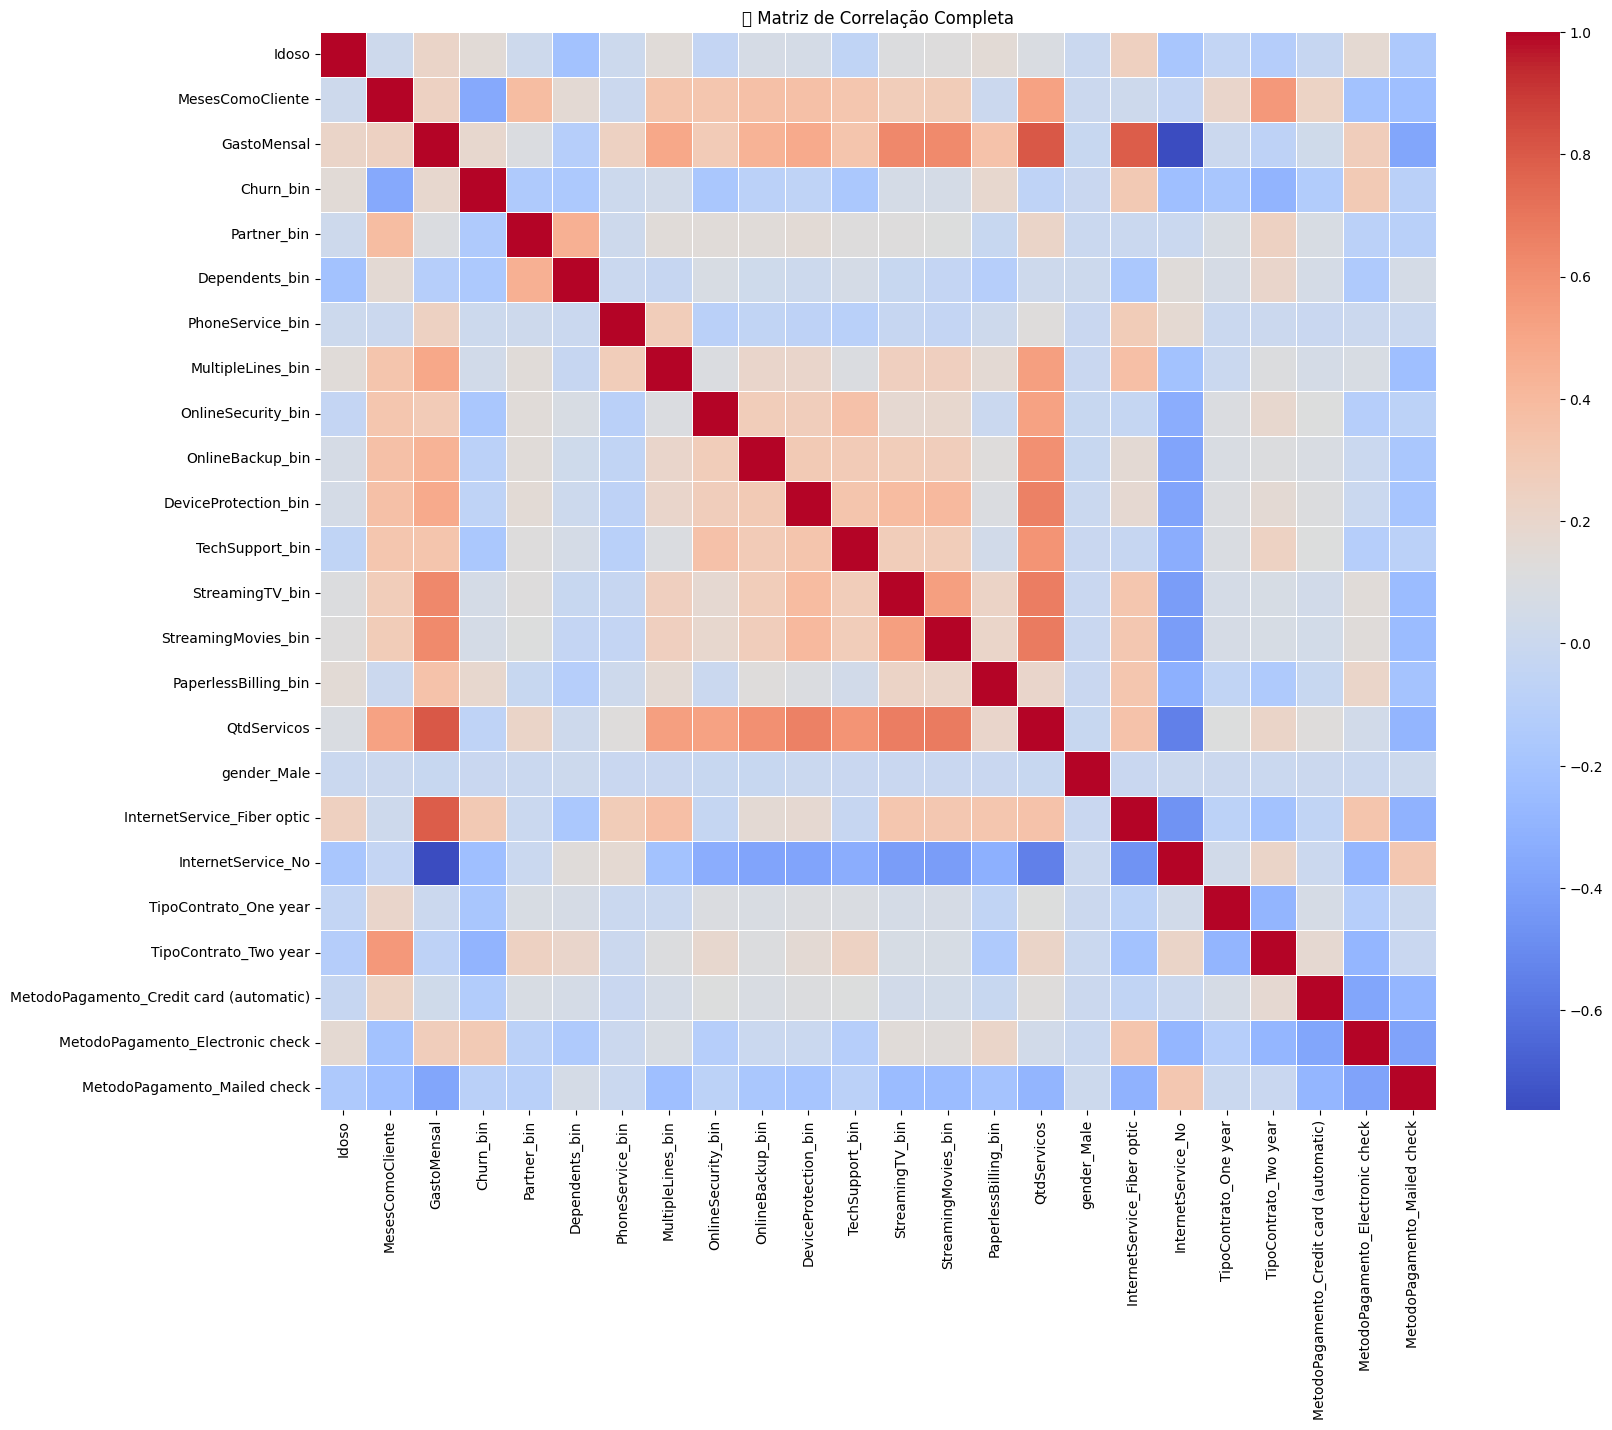

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlação
correlacao = df.corr(numeric_only=True)

# Visualizar a matriz completa (opcional)
plt.figure(figsize=(18, 14))
sns.heatmap(correlacao, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("🔗 Matriz de Correlação Completa")
plt.show()


In [34]:
# Ver correlação com churn (ordenado)
correlacao_churn = correlacao['Churn_bin'].sort_values(ascending=False)

print("🔍 Correlação com Churn:")
print(correlacao_churn)


🔍 Correlação com Churn:
Churn_bin                                  1.000000
InternetService_Fiber optic                0.307463
MetodoPagamento_Electronic check           0.301455
GastoMensal                                0.192858
PaperlessBilling_bin                       0.191454
Idoso                                      0.150541
StreamingTV_bin                            0.063254
StreamingMovies_bin                        0.060860
MultipleLines_bin                          0.040033
PhoneService_bin                           0.011691
gender_Male                               -0.008545
DeviceProtection_bin                      -0.066193
QtdServicos                               -0.067459
OnlineBackup_bin                          -0.082307
MetodoPagamento_Mailed check              -0.090773
MetodoPagamento_Credit card (automatic)   -0.134687
Partner_bin                               -0.149982
Dependents_bin                            -0.163128
TechSupport_bin                         

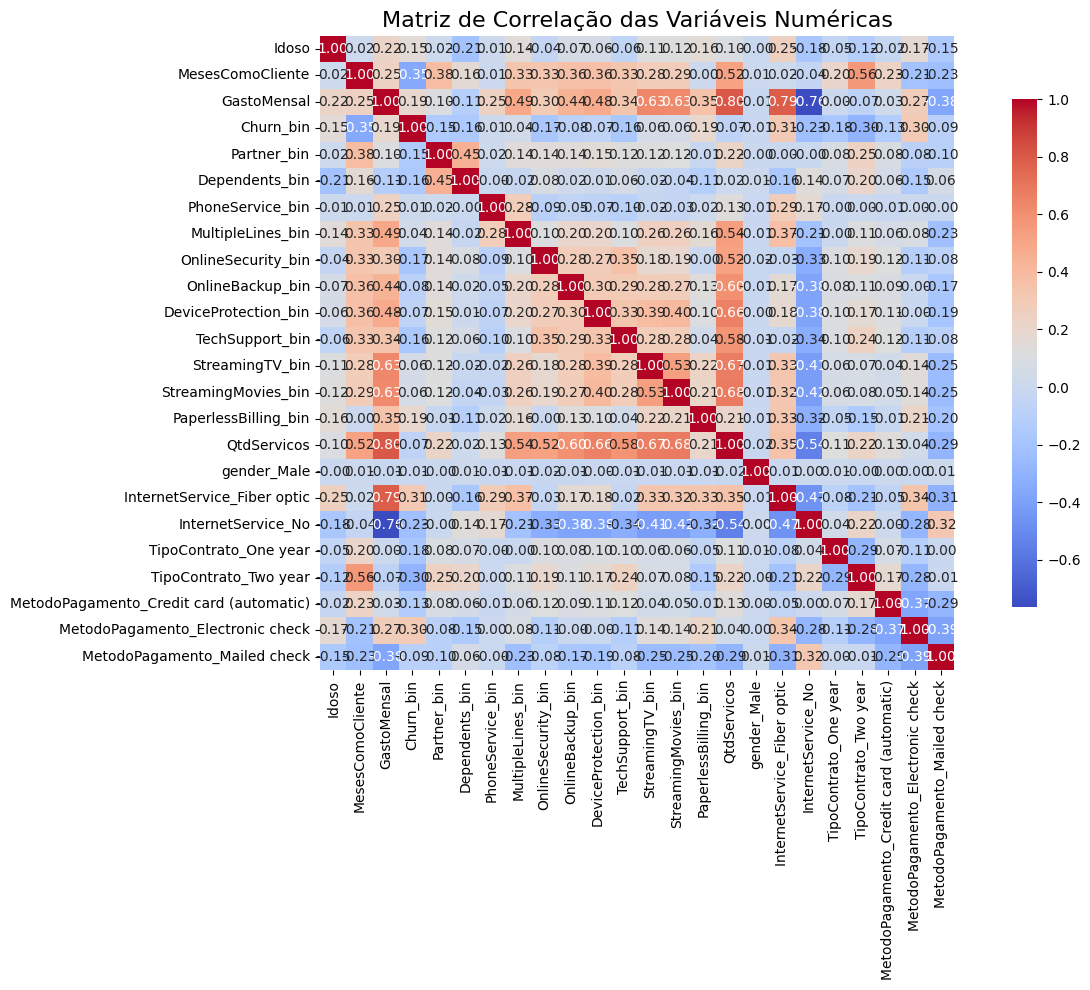

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula a matriz de correlação
correlation_matrix = df.corr()

# Define o tamanho da figura
plt.figure(figsize=(14, 10))

# Cria o heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,               # Mostrar os valores das correlações
    fmt=".2f",                # Duas casas decimais
    cmap="coolwarm",          # Paleta de cores
    square=True,
    cbar_kws={"shrink": 0.8}  # Barra lateral menor
)

plt.title("Matriz de Correlação das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


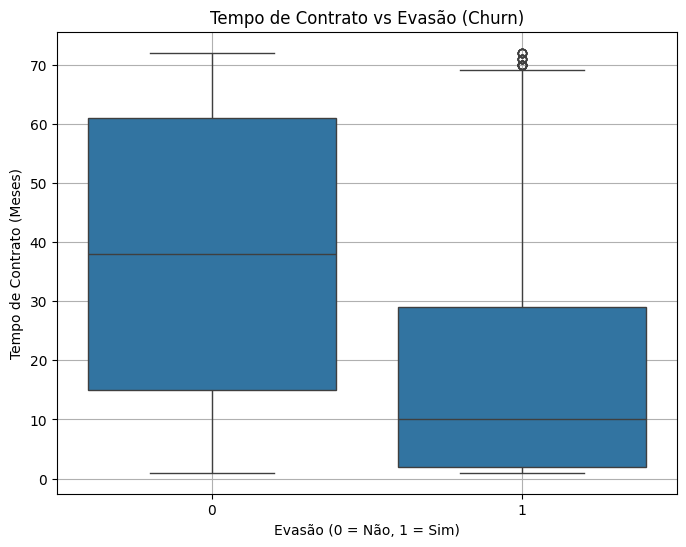

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_bin', y='MesesComoCliente', data=df)
plt.title('Tempo de Contrato vs Evasão (Churn)')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Tempo de Contrato (Meses)')
plt.grid(True)
plt.show()

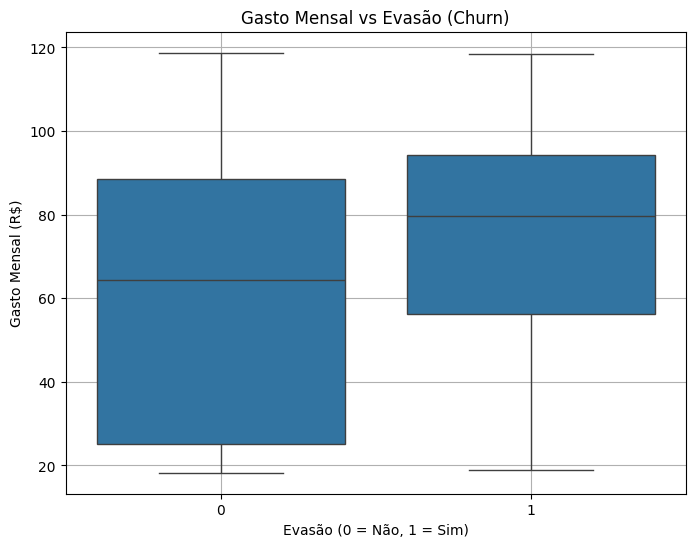

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_bin', y='GastoMensal', data=df)
plt.title('Gasto Mensal vs Evasão (Churn)')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Gasto Mensal (R$)')
plt.grid(True)
plt.show()

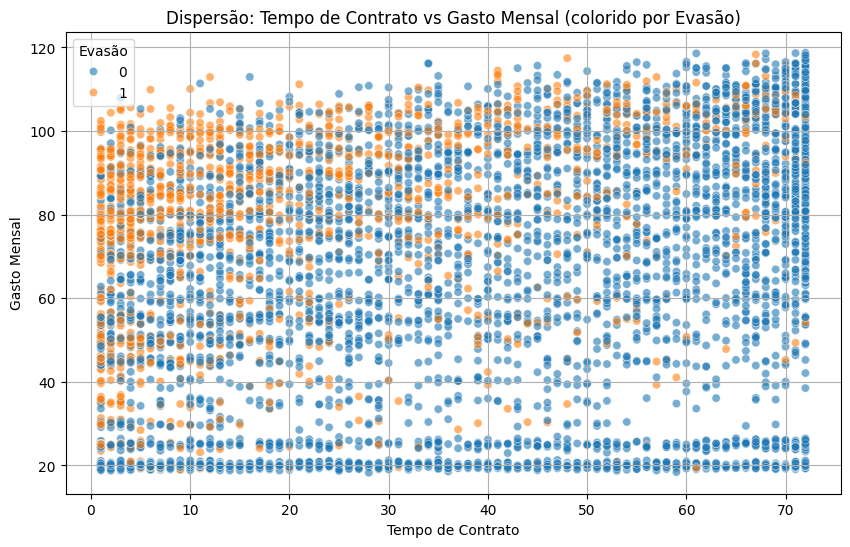

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MesesComoCliente', y='GastoMensal', hue='Churn_bin', data=df, alpha=0.6)
plt.title('Dispersão: Tempo de Contrato vs Gasto Mensal (colorido por Evasão)')
plt.xlabel('Tempo de Contrato')
plt.ylabel('Gasto Mensal')
plt.legend(title='Evasão')
plt.grid(True)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

# Dividir os dados (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,     # 30% para teste
    random_state=42,   # garante reprodutibilidade
    stratify=y         # mantém a proporção da variável alvo nas duas amostras
)

# Verificar as dimensões das amostras
print("Treino - X:", X_train.shape, "| y:", y_train.shape)
print("Teste  - X:", X_test.shape,  "| y:", y_test.shape)


Treino - X: (4922, 23) | y: (4922,)
Teste  - X: (2110, 23) | y: (2110,)


In [40]:
df.to_csv('dados_processados.csv', index=False)


In [41]:
import pickle

with open('X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

# Faça o mesmo para X_test e y_test


In [42]:
with open('modelo_logistico.pkl', 'wb') as f:
    pickle.dump(modelo_log, f)


In [48]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separar features e target
X = df.drop('Churn_bin', axis=1)
y = df['Churn_bin']

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Colunas contínuas para padronizar
colunas_continuas = ['MesesComoCliente', 'GastoMensal', 'QtdServicos']

# Padronização para Regressão Logística
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[colunas_continuas] = scaler.fit_transform(X_train[colunas_continuas])
X_test_scaled[colunas_continuas] = scaler.transform(X_test[colunas_continuas])

# Treinar Regressão Logística
modelo_log = LogisticRegression(max_iter=1000, random_state=42)
modelo_log.fit(X_train_scaled, y_train)
y_pred_log = modelo_log.predict(X_test_scaled)

print("=== Regressão Logística ===")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Treinar Random Forest (sem padronização)
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Salvar os modelos
with open('modelo_regressao_logistica.pkl', 'wb') as f:
    pickle.dump(modelo_log, f)

with open('modelo_random_forest.pkl', 'wb') as f:
    pickle.dump(modelo_rf, f)

# Salvar o scaler para padronização futura
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Modelos e scaler salvos com sucesso!")

=== Regressão Logística ===
[[1391  158]
 [ 262  299]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.53      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

=== Random Forest ===
[[1401  148]
 [ 301  260]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.64      0.46      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.78      2110

Modelos e scaler salvos com sucesso!



🔎 Avaliação do Modelo: Regressão Logística
Acurácia: 0.8009478672985783
Precisão: 0.6542669584245077
Recall: 0.5329768270944741
F1-score: 0.587426326129666

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.53      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



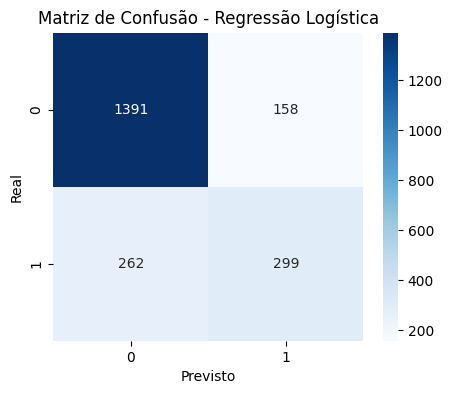


🔎 Avaliação do Modelo: Random Forest
Acurácia: 0.7872037914691943
Precisão: 0.6372549019607843
Recall: 0.46345811051693403
F1-score: 0.5366357069143447

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.64      0.46      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.78      2110



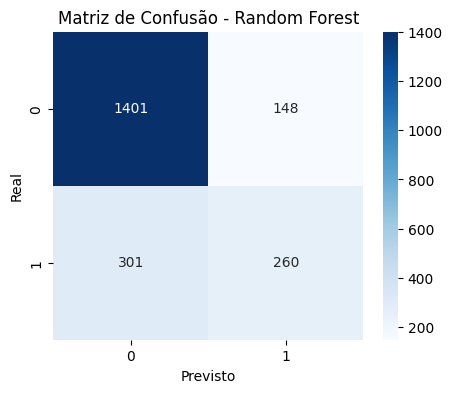


📊 Comparação de Modelos:



,Modelo,Acurácia,Precisão,Recall,F1-score
0,Regressão Logística,0.800948,0.654267,0.532977,0.587426
1,Random Forest,0.787204,0.637255,0.463458,0.536636


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Função para avaliar o modelo
def avaliar_modelo(nome, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n🔎 Avaliação do Modelo: {nome}")
    print("Acurácia:", acc)
    print("Precisão:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

    return {"Modelo": nome, "Acurácia": acc, "Precisão": prec, "Recall": rec, "F1-score": f1}

# Avaliando os dois modelos
resultados = []
resultados.append(avaliar_modelo("Regressão Logística", modelo_log, X_test_scaled, y_test))
resultados.append(avaliar_modelo("Random Forest", modelo_rf, X_test, y_test))

# Comparar resultados em DataFrame
import pandas as pd
df_resultados = pd.DataFrame(resultados)
print("\n📊 Comparação de Modelos:\n")
display(df_resultados)

Based on the `df_resultados` DataFrame, here is a comparison of the models:

| Modelo              | Acurácia | Precisão | Recall   | F1-score |
|---------------------|----------|----------|----------|----------|
| Regressão Logística | 0.801    | 0.654    | 0.533    | 0.587    |
| Random Forest       | 0.787    | 0.637    | 0.463    | 0.537    |

The **Regressão Logística** model has slightly higher accuracy and F1-score compared to the **Random Forest** model on this test set. However, the **Random Forest** model has a slightly higher precision. The **Regressão Logística** model also has a higher recall, meaning it is better at identifying positive cases (churn).

In [45]:
# Salvar o DataFrame de resultados em um arquivo CSV
df_resultados.to_csv('resultados_modelos.csv', index=False)

print("DataFrame df_resultados salvo como 'resultados_modelos.csv'")

DataFrame df_resultados salvo como 'resultados_modelos.csv'


📊 Coeficientes da Regressão Logística (ordenados por impacto absoluto):


,Feature,Coeficiente,Abs_Coeficiente
19,TipoContrato_Two year,-1.216901,1.216901
16,InternetService_Fiber optic,0.874227,0.874227
1,MesesComoCliente,-0.809673,0.809673
17,InternetService_No,-0.753614,0.753614
18,TipoContrato_One year,-0.690241,0.690241
5,PhoneService_bin,-0.479463,0.479463
10,TechSupport_bin,-0.466045,0.466045
21,MetodoPagamento_Electronic check,0.393408,0.393408
13,PaperlessBilling_bin,0.366473,0.366473
7,OnlineSecurity_bin,-0.354077,0.354077


/tmp/ipython-input-2067655662.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Feature', data=df_coeficientes.head(15), palette='coolwarm')


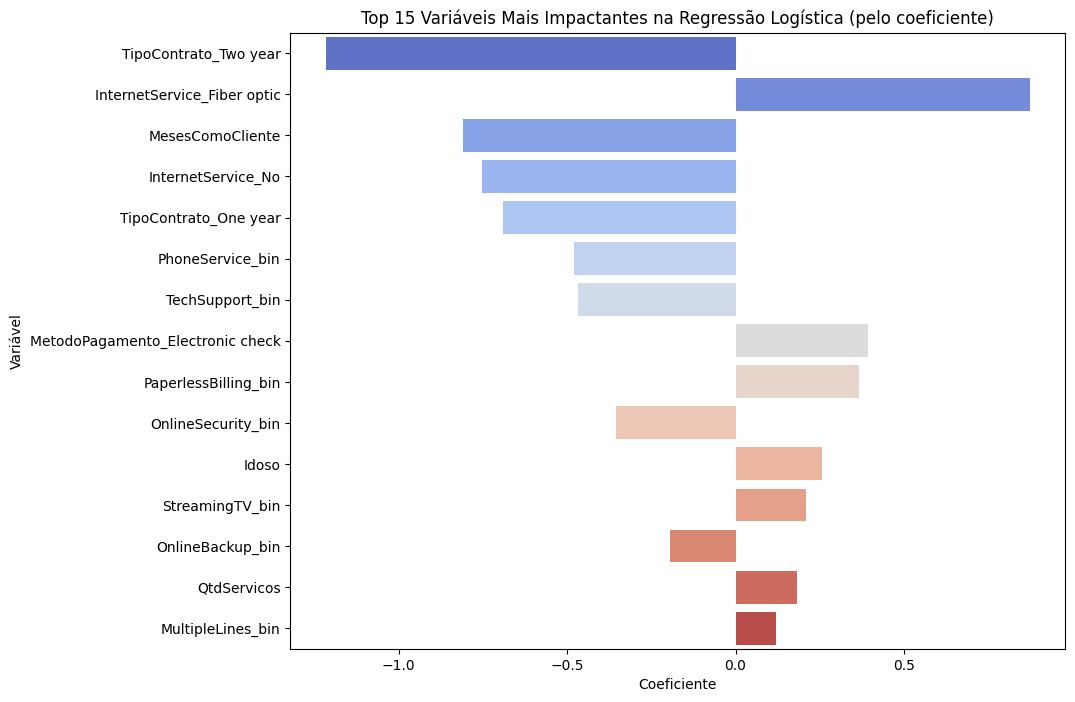

In [46]:
# Análise das variáveis mais relevantes para Regressão Logística

# Obter os coeficientes do modelo
coeficientes = modelo_log.coef_[0]

# Criar um DataFrame com os nomes das variáveis e seus coeficientes
features = X_train_scaled.columns
df_coeficientes = pd.DataFrame({'Feature': features, 'Coeficiente': coeficientes})

# Ordenar por valor absoluto do coeficiente para ver as mais impactantes
df_coeficientes['Abs_Coeficiente'] = abs(df_coeficientes['Coeficiente'])
df_coeficientes = df_coeficientes.sort_values(by='Abs_Coeficiente', ascending=False)

print("📊 Coeficientes da Regressão Logística (ordenados por impacto absoluto):")
display(df_coeficientes)

# Visualizar os coeficientes
plt.figure(figsize=(10, 8))
sns.barplot(x='Coeficiente', y='Feature', data=df_coeficientes.head(15), palette='coolwarm')
plt.title('Top 15 Variáveis Mais Impactantes na Regressão Logística (pelo coeficiente)')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()


🌳 Importância das Variáveis no Random Forest (ordenada):


,Feature,Importância
1,MesesComoCliente,0.228487
2,GastoMensal,0.221518
14,QtdServicos,0.053005
21,MetodoPagamento_Electronic check,0.045591
16,InternetService_Fiber optic,0.044910
19,TipoContrato_Two year,0.036800
15,gender_Male,0.034556
13,PaperlessBilling_bin,0.029385
18,TipoContrato_One year,0.027134
3,Partner_bin,0.027058


/tmp/ipython-input-2945446643.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Feature', data=df_importances.head(15), palette='viridis')


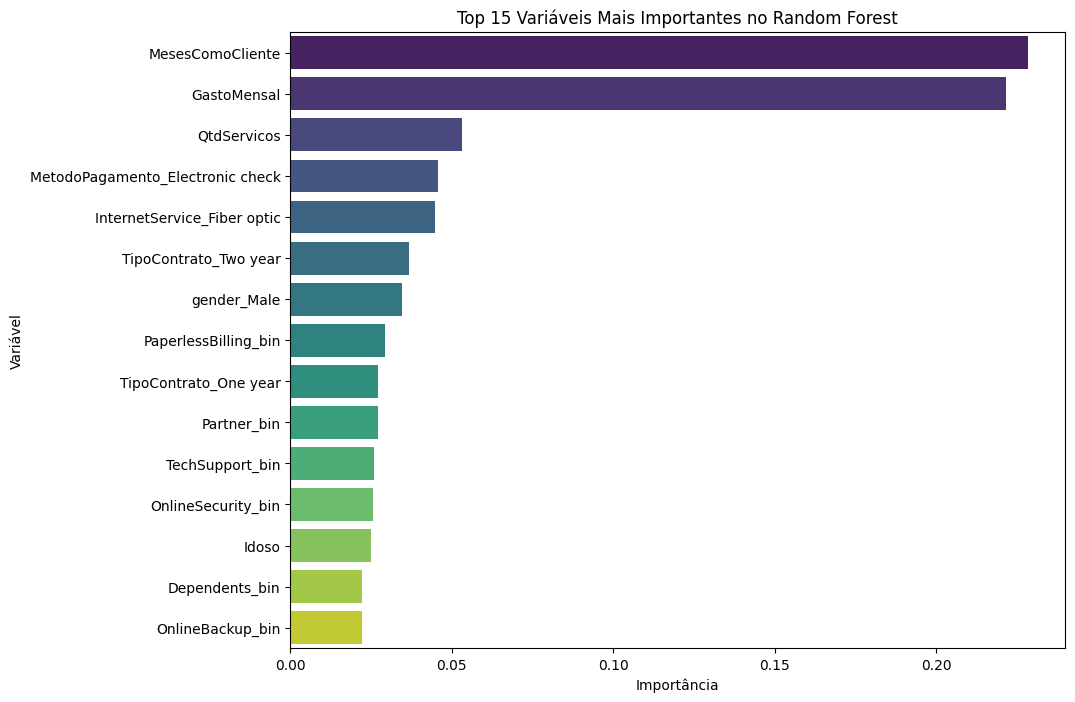

In [47]:
# Análise da importância das variáveis para Random Forest

# Obter a importância das variáveis do modelo
importances = modelo_rf.feature_importances_

# Criar um DataFrame com os nomes das variáveis e suas importâncias
features = X_train.columns
df_importances = pd.DataFrame({'Feature': features, 'Importância': importances})

# Ordenar por importância
df_importances = df_importances.sort_values(by='Importância', ascending=False)

print("\n🌳 Importância das Variáveis no Random Forest (ordenada):")
display(df_importances)

# Visualizar a importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importância', y='Feature', data=df_importances.head(15), palette='viridis')
plt.title('Top 15 Variáveis Mais Importantes no Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

In [49]:
# Salvar o DataFrame de importância das variáveis em um arquivo CSV
df_importances.to_csv('importancia_variaveis_rf.csv', index=False)

print("DataFrame df_importances salvo como 'importancia_variaveis_rf.csv'")

DataFrame df_importances salvo como 'importancia_variaveis_rf.csv'


## Relatório de Análise de Evasão de Clientes (Churn)

Este relatório apresenta uma análise dos fatores que mais influenciam a evasão de clientes, com base nos resultados obtidos dos modelos de Regressão Logística e Random Forest.

### 1. Fatores que mais influenciam a Evasão

Com base na análise dos coeficientes da Regressão Logística e da importância das variáveis no Random Forest, os seguintes fatores se destacam como os mais relevantes para a previsão de evasão:

*   **Tempo de Contrato (MesesComoCliente):** Consistentemente identificado como um dos fatores mais importantes em ambos os modelos. Clientes com menor tempo de contrato (novos clientes) apresentam maior probabilidade de evasão.
*   **Gasto Mensal (GastoMensal):** Também um fator de alta relevância em ambos os modelos. Clientes com gastos mensais mais elevados tendem a ter maior probabilidade de evasão, especialmente aqueles com serviços de maior custo como fibra óptica.
*   **Tipo de Serviço de Internet (InternetService_Fiber optic, InternetService_No):** O tipo de serviço de internet é um preditor significativo de evasão. Clientes com serviço de fibra óptica apresentam maior probabilidade de evasão, enquanto clientes sem serviço de internet são menos propensos a evadir (geralmente associado a planos mais básicos ou telefone fixo).
*   **Tipo de Contrato (TipoContrato_Two year, TipoContrato_One year):** O tipo de contrato tem um impacto considerável na evasão. Clientes com contratos de longo prazo (um ou dois anos) são significativamente menos propensos a evadir do que aqueles com contratos mensais. O contrato de dois anos é o mais impactante na redução da evasão.
*   **Método de Pagamento (MetodoPagamento_Electronic check):** O método de pagamento por cheque eletrônico está associado a uma maior probabilidade de evasão.
*   **Idoso (Idoso):** Clientes idosos parecem ter uma probabilidade ligeiramente maior de evasão.
*   **Serviços Adicionais (OnlineSecurity_bin, TechSupport_bin, OnlineBackup_bin, DeviceProtection_bin, StreamingTV_bin, StreamingMovies_bin):** A presença ou ausência de certos serviços adicionais também influencia a evasão. A falta de serviços como segurança online, suporte técnico e backup online está associada a uma maior probabilidade de evasão.

### 2. Desempenho dos Modelos

A Regressão Logística apresentou um desempenho ligeiramente superior em termos de acurácia e F1-score em comparação com o Random Forest no conjunto de teste utilizado. No entanto, ambos os modelos demonstraram capacidade razoável na previsão de evasão.

*   **Regressão Logística:** Melhor recall, sendo mais eficaz em identificar clientes que irão evadir (reduzindo falsos negativos).
*   **Random Forest:** Ligeiramente melhor precisão, sendo mais preciso quando prevê que um cliente irá evadir (reduzindo falsos positivos).

A escolha do modelo ideal dependerá da prioridade do negócio (minimizar falsos positivos ou falsos negativos).

### 3. Estratégias de Retenção Propostas

Com base nos fatores que mais influenciam a evasão, as seguintes estratégias de retenção podem ser consideradas:

*   **Foco em Novos Clientes:** Implementar programas de onboarding e acompanhamento intensivo para clientes nos primeiros meses de contrato, oferecendo suporte e garantindo uma boa experiência inicial.
*   **Incentivar Contratos de Longo Prazo:** Oferecer descontos ou benefícios exclusivos para clientes que optarem por contratos de um ou dois anos.
*   **Programas de Fidelidade:** Criar programas de fidelidade com recompensas para clientes de longo prazo, incentivando a permanência.
*   **Melhorar a Experiência com Fibra Óptica:** Investigar as causas da maior evasão entre clientes de fibra óptica. Pode ser relacionado a problemas de serviço, custo ou expectativas não atendidas. Melhorar o suporte técnico e a comunicação com esses clientes.
*   **Alternativas ao Cheque Eletrônico:** Incentivar métodos de pagamento alternativos que estejam associados a menor evasão, talvez oferecendo pequenos descontos ou maior conveniência.
*   **Pacotes de Serviços com Segurança e Suporte:** Promover pacotes de serviços que incluam segurança online, suporte técnico e backup, destacando os benefícios para os clientes.
*   **Atendimento Personalizado para Idosos:** Considerar um atendimento mais personalizado e de fácil acesso para clientes idosos, garantindo que suas necessidades sejam atendidas.
*   **Monitoramento de Clientes de Alto Gasto:** Implementar um sistema de alerta para clientes com alto gasto mensal que apresentem outros sinais de risco de evasão, permitindo uma abordagem proativa.

Este relatório serve como ponto de partida para a implementação de ações direcionadas à redução da evasão de clientes. A análise contínua e o monitoramento do desempenho das estratégias de retenção são essenciais para o sucesso a longo prazo.